## Neural Network Multiclass Classification with PyTorch
### Mateusz Cedro
Implementation of Neural Network Multiclass Classification model from scratch with PyTorch

## 0. Import libraries

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn

In [2]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Data

tensor([[-7.9885,  6.5468],
        [-4.6533, -5.9822],
        [-5.2046, -6.6521],
        [ 3.2618, -0.5764],
        [ 3.8611, -2.5363]]) tensor([3, 2, 2, 1, 1])


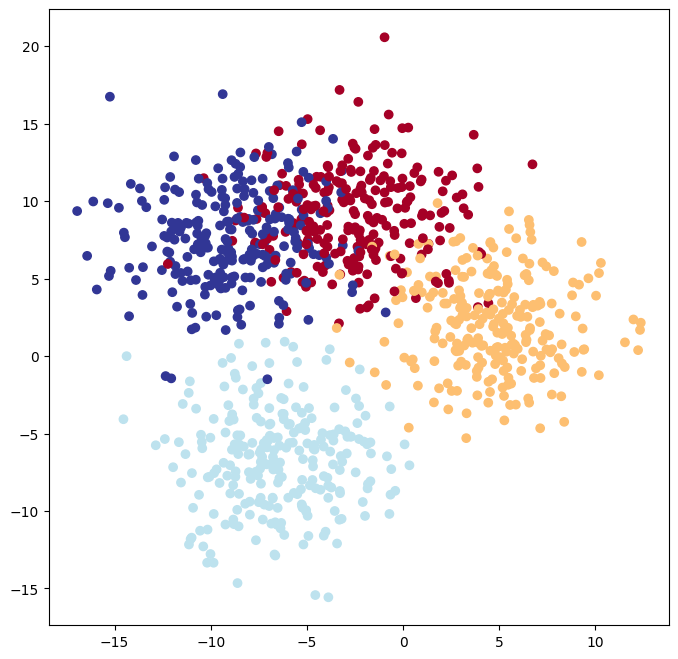

In [3]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=3,
    random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(8, 8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

## 2. Building Multiclass Classification Model

In [4]:
# Model class

class MulticlassModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

model = MulticlassModel(input_features=NUM_FEATURES,
                        output_features=NUM_CLASSES,
                        hidden_units=100).to(device)
model

MulticlassModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=4, bias=True)
  )
)

In [5]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [6]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Model training

In [7]:
# Set seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Number of training epochs
epochs = 50

# Data to device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)



for epoch in range(epochs):
  ### Training
  model.train()

  y_logits = model(X_blob_train).squeeze()
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test).squeeze()
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Accuracy: {acc:.2f}%")



Epoch: 0 | Loss: 1.72780, Accuracy: 16.38% | Test loss: 1.38952, Test Accuracy: 16.38%
Epoch: 10 | Loss: 0.63060, Accuracy: 85.88% | Test loss: 0.58771, Test Accuracy: 85.88%
Epoch: 20 | Loss: 0.46150, Accuracy: 87.75% | Test loss: 0.43243, Test Accuracy: 87.75%
Epoch: 30 | Loss: 0.39629, Accuracy: 87.62% | Test loss: 0.36769, Test Accuracy: 87.62%
Epoch: 40 | Loss: 0.36294, Accuracy: 87.75% | Test loss: 0.33259, Test Accuracy: 87.75%


## 4. Visualizing decision boundaries

In [8]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


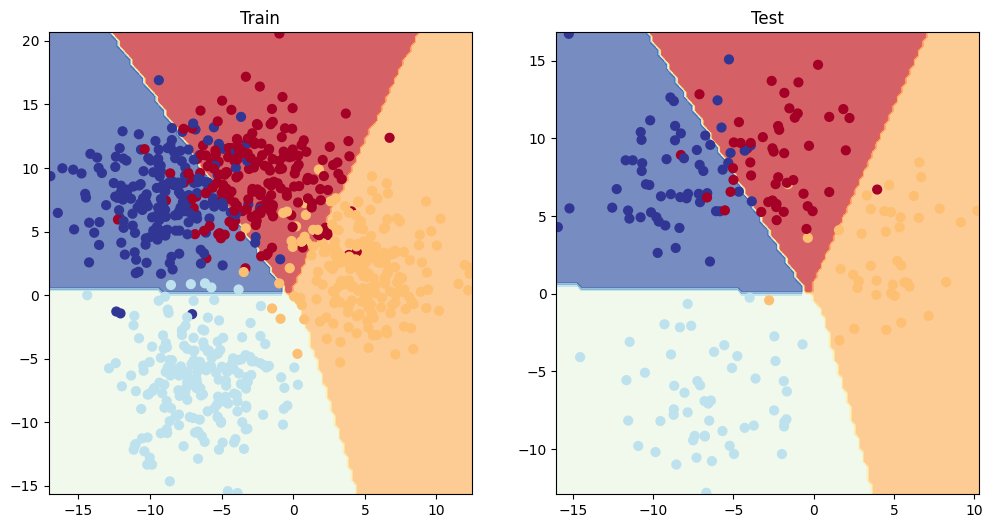

In [9]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)

## Implementation of Neural Network Multiclass Classification Model from Scratch with PyTorch
### Mateusz Cedro